In [1]:
import matplotlib.pyplot as plt
import glob
import sys
import pandas as pd
import numpy as np
import sortednp as snp
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
from matplotlib import rc
rc('font', family='helvetica')
import seaborn as sns
import time
import itertools

In [2]:
"Some colorbrewer colors you can use."
p1 = np.array([224/256, 236/256, 244/256, 1])
p2 = np.array([158/256, 160/256, 218/256, 1])
p3 = np.array([136/256, 86/256, 167/256, 1])
g1 = np.array([229/256, 245/256, 249/256, 1])
g2 = np.array([153/256, 216/256, 201/256, 1])
g3 = np.array([44/256, 162/256, 95/256, 1])
o1 = np.array([254/256, 232/256, 200/256, 1])
o2 = np.array([253/256, 187/256, 132/256, 1])
o3 = np.array([227/256, 74/256, 51/256, 1])

In [3]:
"""Define the folders with your input data."""
monomer='/Users/mallu899/Mirror/projects/lacI_CG_master/data/Mono_txt_20/'
dimer='/Users/mallu899/Mirror/projects/lacI_CG_master/data/dimer_RS_txt/'
full_dimer='/Users/mallu899/Mirror/projects/lacI_CG_master/data/fullLength_txt/trajectory_classify_diffusion/'

In [4]:
def import_displacement_csv_as_dataframe(file, nrows):
    """
    Import data from the displacement trajectory analysis.

    Parameter
    ---------
        file : str
            The folder location with the displacement
                      trajectory analysis output files named as
                      '*Displacement_H2A.txt' and '*Displacement_H2B.txt'.
        nrows : int
            The number of rows to import.

    Returns
    -------
               A DataFrame table with columns
               'distance' (Å) ,'position' (Å),'angle' (degrees).
    """
    
    data = np.array(pd.read_csv(file,sep='\s+',header=None,nrows=nrows))
    
    d = {'distance': data[:,1],
        'position': data[:,0],
        'angle': data[:,2]*(180/np.pi)} #angle from radians into degrees
    dataframe=pd.DataFrame(d)
    #print(dataframe)
    return (dataframe)

In [5]:
class TrajectoryToDataFrame():
    """
    Class that obtains the analysis of the protein, either monomeric or dimeric, 
    in form of a pandas Dataframe 
    or a list of Dataframes for DNA-binding domains A and B in a dimer.
    
    Methods
    -------
    dimer(folder,nrows=100000)
        Analysis for dimeric DNA-binding proteins.
        
    monomer(folder,nrows=100000)
        Analysis for monomeric DNA-binding proteins.
        
    """
    
    def dimer(folder,nrows=100000):
        """Import data from the displacement trajectory analysis.

        Parameter
        ---------
            folder (str): The folder location with the displacement
                          trajectory analysis output files named as
                          '*Displacement_H2A.txt' and '*Displacement_H2B.txt'
            nrows (int): number of rows to import

        Returns
        -------
            tuple: .
                   Each element in a list is a DataFrame table with columns
                   'distance','position','angle'.
                   two lists corresponding to the A and B proteins
        """

        filesA = sorted(glob.glob(folder+'*Displacement_H2A.txt'))
        filesB = sorted(glob.glob(folder+'*Displacement_H2B.txt'))
        if len(filesA) != len(filesB):
            raise ImportError('Number of files for A and B must be the same')
        dataframes = []
        files = (filesA,filesB)
        for i in range(2):
            dataframes_ = []
            for file in files[i]:
                dataframes_.append(import_displacement_csv_as_dataframe(file,nrows))
            dataframes.append(dataframes_)

        return tuple(dataframes)
    
    def monomer(folder,nrows=100000):
        """Import data from the displacement trajectory analysis for the monomer.
        
        Parameter
        ---------
            folder (str): The folder location with the displacement
                          trajectory analysis output files named as
                          '*Displacement_*.txt' 
            nrows (int): number of rows to import

        Returns
        -------
            tuple: .
                   Each element in a list is a DataFrame table with columns
                   'distance','position','angle'.
                   two lists corresponding to the A and B proteins
        """

        files = sorted(glob.glob(folder+'*Displacement_*.txt'))

        dataframes = []
        files = files
        for file in files:
            dataframes.append(import_displacement_csv_as_dataframe(file,nrows))

        return tuple(dataframes)

In [6]:
monomerS001=TrajectoryToDataFrame.monomer(monomer+'S01/')
monomerS002=TrajectoryToDataFrame.monomer(monomer+'S02/')
monomerS003=TrajectoryToDataFrame.monomer(monomer+'S03/')
monomerS004=TrajectoryToDataFrame.monomer(monomer+'S04/')

monomerR001=TrajectoryToDataFrame.monomer(monomer+'R01/')
monomerR002=TrajectoryToDataFrame.monomer(monomer+'R02/')
monomerR003=TrajectoryToDataFrame.monomer(monomer+'R03/')
monomerR004=TrajectoryToDataFrame.monomer(monomer+'R04/')

dimerS001=TrajectoryToDataFrame.dimer(dimer+'S/001/')
dimerS002=TrajectoryToDataFrame.dimer(dimer+'S/002/')
dimerS003=TrajectoryToDataFrame.dimer(dimer+'S/003/')
dimerS004=TrajectoryToDataFrame.dimer(dimer+'S/004/')
dimerS005=TrajectoryToDataFrame.dimer(dimer+'S/005/')
dimerS006=TrajectoryToDataFrame.dimer(dimer+'S/006/')

dimerR001=TrajectoryToDataFrame.dimer(dimer+'R/001/')
dimerR002=TrajectoryToDataFrame.dimer(dimer+'R/002/')
dimerR003=TrajectoryToDataFrame.dimer(dimer+'R/003/')
dimerR004=TrajectoryToDataFrame.dimer(dimer+'R/004/')
dimerR005=TrajectoryToDataFrame.dimer(dimer+'R/005/')
dimerR006=TrajectoryToDataFrame.dimer(dimer+'R/006/')

full_dimerR001=TrajectoryToDataFrame.dimer(full_dimer+'R_full_Length_8_replica_A_B/01/')
full_dimerR002=TrajectoryToDataFrame.dimer(full_dimer+'R_full_Length_8_replica_A_B/02/')
full_dimerR003=TrajectoryToDataFrame.dimer(full_dimer+'R_full_Length_8_replica_A_B/03/')
full_dimerR004=TrajectoryToDataFrame.dimer(full_dimer+'R_full_Length_8_replica_A_B/04/')
full_dimerR005=TrajectoryToDataFrame.dimer(full_dimer+'R_full_Length_8_replica_A_B/05/')
full_dimerR006=TrajectoryToDataFrame.dimer(full_dimer+'R_full_Length_8_replica_A_B/06/')

full_dimerS001=TrajectoryToDataFrame.dimer(full_dimer+'S_full_Length_8_replica_A_B/01/')
full_dimerS002=TrajectoryToDataFrame.dimer(full_dimer+'S_full_Length_8_replica_A_B/02/')
full_dimerS003=TrajectoryToDataFrame.dimer(full_dimer+'S_full_Length_8_replica_A_B/03/')
full_dimerS004=TrajectoryToDataFrame.dimer(full_dimer+'S_full_Length_8_replica_A_B/04/')
full_dimerS005=TrajectoryToDataFrame.dimer(full_dimer+'S_full_Length_8_replica_A_B/05/')
full_dimerS006=TrajectoryToDataFrame.dimer(full_dimer+'S_full_Length_8_replica_A_B/06/')

In [7]:
class Grooves():  
    """This class contains functions that relate the position and the angle 
     along the major grooves center in the static, generic B-DNA. 
     The groove-functions are a reference frame used to identify sliding.
     These class contains methods for plotting in bp steps and radians.
     
    Methods
    ----------
    f0p-f9p: int 
         return the angle in radians for a position in bp, for better plotting.
    f0y-f9y: int 
         return the position for an angle.
    groove_functions_angle_plotting
        return list(f0p-f9p)
    groove_functions_position_plotting
        return list(f0yp-f9yp)
    
    Usage
    -----
    Grooves.groove_functions()[0](3) returns f0(3)
    
    """

    def f0p(x):
        return ((x*3.3-100)*(9.78636231/180*np.pi))-(1410.46658798/180)*np.pi
    def f0yp(y):
        return (y-(-1410.46658798))/9.78636231
    def f1p(x):
        return ((x*3.3-100)*(10.43608208/180*np.pi))-(1157.42910297/180)*np.pi
    def f1yp(y):
        return (y-(-1157.42910297))/10.43608208
    def f2p(x):
        return ((x*3.3-100)*(10.43608208/180*np.pi))-(805.4409265/180)*np.pi
    def f2yp(y):
        return (y-(-805.4409265))/10.43608208
    def f3p(x):
        return ((x*3.3-100)*(10.43608208/180*np.pi))-(453.45275003/180)*np.pi
    def f3yp(y):
        return (y-(-453.45275003))/10.43608208
    def f4p(x):
        return ((x*3.3-100)*(10.43608208/180*np.pi))-(101.46457357/180)*np.pi
    def f4yp(y):
        return (y-(-101.46457357))/10.43608208
    def f5p(x):
        return ((x*3.3-100)*(10.43608208/180*np.pi))+(250.5236029/180)*np.pi
    def f5yp(y):
        return (y-(250.5236029))/10.43608208
    def f6p(x):
        return ((x*3.3-100)*(10.43608208/180*np.pi))+(602.51177936/180)*np.pi
    def f6yp(y):
        return (y-(602.51177936))/10.43608208
    def f7p(x):
        return ((x*3.3-100)*(10.43608208/180*np.pi))+(954.49995583/180)*np.pi
    def f7yp(y):
        return (y-(954.49995583))/10.43608208
    def f8p(x):
        return ((x*3.3-100)*(10.43608208/180*np.pi))+(1306.48813229/180)*np.pi
    def f8yp(y):
        return (y-(1306.48813229))/10.43608208
    def f9p(x):
        return ((x*3.3-100)*(10.43608208/180*np.pi))+(1658.47630876/180)*np.pi
    def f9yp(y):
        return (y-(1658.47630876))/10.43608208
    
    def groove_functions_plotting():
        "Functions that obtain the angle for a value of X-DNA."
        return(Grooves.f0p,Grooves.f1p,Grooves.f2p,Grooves.f3p,Grooves.f4p,Grooves.f5p,Grooves.f6p,Grooves.f7p,Grooves.f8p,Grooves.f9p)
    
    def groove_functions_y_plotting():
        "Functions that obtain the value of X-DNA for one angle."
        return(Grooves.f0yp,Grooves.f1yp,Grooves.f2yp,Grooves.f3yp,Grooves.f4yp,Grooves.f5yp,Grooves.f6yp,Grooves.f7yp,Grooves.f8yp,Grooves.f9yp)

In [33]:
class TrajectoryPlotting:
    """Class for plotting of the the trajectory data obtained from TrajectoryToDataFrame.
    
    Methods
    -------
    plot_distance_position_angle_dimer()
    
    """
    
    def __init__(self,distance_position_angle_df):
        """
        Parameters
        ----------
        distance_position_angle_df : pd.DataFrame
            The dataframe with distance, position and angle.
        """
        
        self.distance_position_angle_df=distance_position_angle_df[0][replica]
    
    def plot_distance_position_angle_dimer(self, replica, color, save_file_name=None):
        """Plot distance, position and angle relative to the DNA axis.
        
        Parameters
        ----------
        replica : int
            Replica to plot.
        save_file_name: str, optional
            Default is None.
            Location and file name for figure to be saves, dpi is 300."""
        
        dfA = self[0][replica]
        dfB = self[1][replica]
        
        #fig, ax = plt.subplots(figsize = (2.5,2.),frameon=False,edgecolor='white')
        fig, ax = plt.subplots(figsize = (5.2,2.3),frameon=False,edgecolor='white')
        ax.plot(dfA['position']/3.3+50,label='DBD A',color=o2,linewidth=0.8)
        ax.plot(dfB['position']/3.3+50,label='DBD B',color=o1,linewidth=0.8)

        ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
        ax2.plot(dfA['distance'],'-',label='$d$ (DBD A)',color=o2,linewidth=0.8)
        ax2.plot(dfB['distance'],'-',label='$d$ (DBD B)',color=o1,linewidth=0.8)

        #ax3 = ax.twinx()  # instantiate a third axes that shares the same x-axis
        frames = np.arange(len(dfA['angle']))
        #ax3.scatter(frames,dfA['angle']*(np.pi/180),label='$\phi$ (DBD A)',s=0.00005,color=o2)
        #ax3.scatter(frames,dfB['angle']*(np.pi/180),label='$\phi$ (DBD B)',s=0.00005,color=o1)
        plt.legend([],[], frameon=False)
        #ax.legend(bbox_to_anchor=(0.,0.,0.,0.), borderaxespad=0.,title=False,title_fontsize=9
        #           ,markerscale=20,fontsize=10,ncol=1,labelspacing=0.1,handlelength=0.5,edgecolor='white',loc='lower left')
        ax.tick_params(
            axis='both',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=True,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=True,
            labeltop = False,
            right=False, left=True, labelleft=True,labelsize='medium',
            width = 1,
            length = 3, color='k',direction ='in')
        ax.tick_params(
            axis='y',          # changes apply to the x-axis
            which='both',colors='k')
        ax2.tick_params(
            axis='y',          # changes apply to the x-axis
            which='both',colors='k')
        #ax3.tick_params(
        #    axis='y',          # changes apply to the x-axis
        #    which='both',colors='k')
        #ax3.tick_params(
        #    axis='both',          # changes apply to the x-axis
        #    which='both',      # both major and minor ticks are affected
        #    bottom=True,      # ticks along the bottom edge are off
        #    top=False,         # ticks along the top edge are off
        #    labelbottom=True,
        #    labeltop = False,
        #    right=False, left=True, labelright=False, labelleft=True,labelsize='medium',
        #    width = 1,
        #    length = 3, color='k',direction ='in')
        ax.spines['top'].set_visible(False)
        ax2.spines['top'].set_visible(False)
        #ax3.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        #ax3.spines['right'].set_visible(False)
        ax.set_ylim((0,190))
        ax2.set_ylim((-100,80))
        #ax3.set_ylim((-100,7))
        ax.set_yticks(np.arange(0,101,20))
        ax2.set_yticks(np.arange(0,61,20))
        #ax3.set_yticks(np.arange(0,6+0.0001,6))
        ax.set_ylabel('Z(bp)',color='k',position=(0,0.33), fontsize = 10)
        ax2.set_ylabel('$d$ (Å)',color='k',position=(0,0.7), fontsize = 10)
        #ax3.set_ylabel('$\phi$ (rad)',color='k',position=(0,0.92), fontsize = 10)
        ax.set_xlabel('time (ms)', fontsize = 10)
        plt.xticks([0,20000,40000,60000,80000,100000],[0,1,2,3,4,5])
        #ax3.yaxis.set_label_position("left")
        plt.tight_layout()
        
        if save_file_name:
            plt.savefig(save_file_name,dpi=600,transparent=True)
            
    def plot_position_angle_monomer(data, replica, skip_frames, color, save_file_name=None):
        """Plot the position and the angle of the trajectory. 
        
        Dependencies
        ------------
        The grooves are going to be indicated based on the Grooves.groove_functions_angle_plotting
        module. 
        
        Parameters
        ----------
        replica : int
            Replica to plot.
        skip_frame: int
            How many frames to skip for plotting.
        save_file_name: str, optional
            Default is None.
            Location and file name for figure to be saves, dpi is 300.
        """
        
        dfA = data[replica]#[10000:30000]
        #dfB = self[1][replica][10000:30000]
        fig, ax = plt.subplots(figsize = (2.,1.8),frameon=False)
        #fig, ax = plt.subplots(figsize = (4.,3))
        plt.scatter(dfA['position'][::skip_frames]/3.3+50,dfA['angle'][::skip_frames]*(np.pi/180),\
                    c=np.arange(len(dfA)),cmap='rainbow',s=0.05)
        #plt.plot(dfA['position'][::skip_frames]/3.3+50,dfB['angle'][::skip_frames]*(np.pi/180),color=color,linewidth=0.5)

        ax.tick_params(
                    axis='both',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=True,      # ticks along the bottom edge are off
                    top=True,         # ticks along the top edge are off
                    labelbottom=True,
                    labeltop = False,
                    right=True, left=True, labelleft=True,labelsize='small',
                    width = 0.5,
                    length = 3, color='k',direction ='in')
        ax.tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',colors='k')
        ax.tick_params(
                axis='y',          # changes apply to the x-axis
                which='both',colors='k')
        Ztt = np.arange(10,90,10)
        for f in range(len(Grooves.groove_functions_plotting())):
            plt.plot(Ztt,Grooves.groove_functions_plotting()[f](Ztt)-1.5,':',alpha=0.7,color='grey')
            plt.plot(Ztt,Grooves.groove_functions_plotting()[f](Ztt)+1.5,':',alpha=0.7,color='grey')
        axes = plt.gca()
        axes.set_ylim(0,2*np.pi)
        axes.set_xlim(10,80)
        plt.ylabel('$\phi$ (rad)', fontsize = 9,color='k')
        plt.xlabel('Z (bp)', fontsize = 9,color='k')
        plt.tight_layout()
        if save_file_name:
            plt.savefig(save_file_name,dpi=300,transparent=True)
            
    def plot_position_angle_dimer(self, replica, skip_frames, color, save_file_name=None):
        """Plot the position and the angle of the trajectory. 
        
        Dependencies
        ------------
        The grooves are going to be indicated based on the Grooves.groove_functions_angle_plotting
        module. 
        
        Parameters
        ----------
        replica : int
            Replica to plot.
        skip_frame: int
            How many frames to skip for plotting.
        save_file_name: str, optional
            Default is None.
            Location and file name for figure to be saves, dpi is 300.
        """
        
        dfA = self[0][replica]
        dfB = self[1][replica]
        #fig, ax = plt.subplots(figsize = (2.5,2.))
        #fig, ax = plt.subplots(figsize = (3.2,2.3))
        fig, ax = plt.subplots(figsize = (4.2,2.8))
        plt.scatter(dfA['position'][::skip_frames]/3.3+50,dfA['angle'][::skip_frames]*(np.pi/180),\
                    c=np.arange(len(dfA[::skip_frames])),cmap='rainbow',s=0.05)
        plt.scatter(dfB['position'][::skip_frames]/3.3+50,dfB['angle'][::skip_frames]*(np.pi/180),\
                    c=np.arange(len(dfA[::skip_frames])),cmap='rainbow',s=0.05)
        #plt.plot(dfB['position'][::skip_frames]/3.3+50,dfB['angle'][::skip_frames]*(np.pi/180),color=color,linewidth=0.5)

        ax.tick_params(
                    axis='both',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=True,      # ticks along the bottom edge are off
                    top=True,         # ticks along the top edge are off
                    labelbottom=True,
                    labeltop = False,
                    right=True, left=True, labelleft=True,labelsize='small',
                    width = 0.5,
                    length = 3, color='k',direction ='in')
        ax.tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',colors='k')
        ax.tick_params(
                axis='y',          # changes apply to the x-axis
                which='both',colors='k')
        Ztt = np.arange(10,90,10)
        for f in range(len(Grooves.groove_functions_plotting())):
            plt.plot(Ztt,Grooves.groove_functions_plotting()[f](Ztt)-1.5,':',alpha=0.7,color='grey')
            plt.plot(Ztt,Grooves.groove_functions_plotting()[f](Ztt)+1.5,':',alpha=0.7,color='grey')
        axes = plt.gca()
        axes.set_ylim(0,2*np.pi)
        axes.set_xlim(10,80)
        plt.ylabel('$\phi$ (rad)', fontsize = 10,color='k')
        plt.xlabel('Z (bp)', fontsize = 10,color='k')
        plt.tight_layout()
        plt.colorbar()
        if save_file_name:
            plt.savefig(save_file_name,dpi=300,transparent=True)
            
    def plot_distance_AB_dimer(self, R_data, replica, skip_frames, save_file_name=None):
        """Plot the distances of binding domains from the DNA axis along the trajectory. 
        
        Parameters
            ----------
        replica : int
            Replica to plot.
        skip_frame: int
            How many frames to skip for plotting.
        save_file_name: str, optional
            Default is None.
            Location and file name for figure to be saves, dpi is 300."""
            
        dfAS = self[0][replica]
        dfBS = self[1][replica]
        dfAR = R_data[0][replica]
        dfBR = R_data[1][replica]
        fig, ax = plt.subplots(figsize = (1.8,1.8))
        plt.scatter(dfAS['distance'][::skip_frames],dfBS['distance'][::skip_frames],color=o2,s=0.002)
        plt.scatter(dfAR['distance'][::skip_frames],dfBR['distance'][::skip_frames],color='darkcyan',s=0.002)
            #plt.scatter(A3R[2]['distXY'][::skip_frames],B3R[2]['distXY'][::skip_frames],color='peachpuff',s=0.002,alpha=1,label='R')
        ax.tick_params(
                    axis='y',          # changes apply to the y-axis
                    which='both',colors='k')
        ax.tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',colors='k')
        axes = plt.gca()
        axes.set_xlim(0,51)
        axes.set_ylim(0,51)
        plt.xticks([0,10,20,30,40,50])
        plt.yticks([0,10,20,30,40,50])
        axes.set_aspect('equal')
        ax.tick_params(
                    axis='both',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=True,      # ticks along the bottom edge are off
                    top=True,         # ticks along the top edge are off
                    labelbottom=True,
                    labeltop = False,
                    right=True, left=True, labelleft=True,labelsize='small',
                    width = 0.5,
                    length = 3, color='k',direction ='in')

        plt.ylabel('d (Å) DBD A', fontsize = 9,color='k')
        plt.xlabel('d (Å) DBD B', fontsize = 9,color='k')
        #plt.legend(markerscale=100,fontsize=9,ncol=1,labelspacing=0.1,handlelength=0.5)
        plt.tight_layout()
        if save_file_name:
            plt.savefig(save_file_name,dpi=300,transparent=True)
            
    def plot_position_angle_dimer_hex(self, skip_frames, save_file_name=None):
        """Plot the position and the angle of the trajectory for all replicas using seaborns kde plot. 
        
        Dependencies
        ------------
        The grooves are going to be indicated based on the Grooves.groove_functions_angle_plotting
        module. 
        
        Parameters
        ----------
        skip_frame: int
            How many frames to skip for plotting.
        save_file_name: str, optional
            Default is None.
            Location and file name for figure to be saves, dpi is 300.
        """

        dfA = pd.concat([self[0][replica] for replica in range(len(self[0]))])
        #dfB = pd.concat([self[1][replica] for replica in range(len(self[0]))])
        #fig, ax = plt.subplots(figsize = (2.5,2.))
        fig, ax = plt.subplots(figsize = (3.,2.1))
        #sns.kdeplot(dfA['position'][::skip_frames]/3.3+50,dfA['angle'][::skip_frames]*(np.pi/180),\
        #            shade=True, cmap=cmap, n_levels=50, cbar=True)
        #sns.displot(dfA['position'][::skip_frames]/3.3+50,dfA['angle'][::skip_frames]*(np.pi/180),\
        #            cmap=cmap)
        plt.hexbin(dfA['position'][::skip_frames]/3.3+50, dfA['angle'][::skip_frames]*(np.pi/180), \
                   gridsize=80, cmap=cmap, extent=[0, 100, 0, 2*np.pi])
        #plt.plot(dfB['position'][::skip_frames]/3.3+50,dfB['angle'][::skip_frames]*(np.pi/180),color=color,linewidth=0.5)

        ax.tick_params(
                    axis='both',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=True,      # ticks along the bottom edge are off
                    top=True,         # ticks along the top edge are off
                    labelbottom=True,
                    labeltop = False,
                    right=True, left=True, labelleft=True,labelsize='small',
                    width = 0.5,
                    length = 3, color='k',direction ='in')
        ax.tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',colors='k')
        ax.tick_params(
                axis='y',          # changes apply to the x-axis
                which='both',colors='k')
        Ztt = np.arange(10,90,10)
        for f in range(len(Grooves.groove_functions_plotting())):
            plt.plot(Ztt,Grooves.groove_functions_plotting()[f](Ztt)-1.5,':',alpha=0.7,color='grey')
            plt.plot(Ztt,Grooves.groove_functions_plotting()[f](Ztt)+1.5,':',alpha=0.7,color='grey')
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(12)
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(12)
        plt.colorbar()
        axes = plt.gca()
        axes.set_ylim(0,2*np.pi)
        axes.set_xlim(10,80)
        plt.ylabel('$\phi$ (rad)', fontsize = 12,color='k')
        plt.xlabel('Z (bp)', fontsize = 12,color='k')
        plt.tight_layout()
        if save_file_name:
            plt.savefig(save_file_name,dpi=300,transparent=True)
            
    def plot_position_angle_monomer_hex(data, skip_frames, save_file_name=None):
        """Plot the position and the angle of the trajectory for all replicas using seaborns kde plot. 
        
        Dependencies
        ------------
        The grooves are going to be indicated based on the Grooves.groove_functions_angle_plotting
        module. 
        
        Parameters
        ----------
        skip_frame: int
            How many frames to skip for plotting.
        save_file_name: str, optional
            Default is None.
            Location and file name for figure to be saves, dpi is 300.
        """

        dfA = pd.concat([data[replica] for replica in range(len(data))])
        #dfB = self[1][replica]
        #fig, ax = plt.subplots(figsize = (2.5,2.))
        fig, ax = plt.subplots(figsize = (3.,2.1))

        #sns.kdeplot(dfA['position'][::skip_frames]/3.3+50,dfA['angle'][::skip_frames]*(np.pi/180),\
        #            shade=True, cmap=cmap, n_levels=50, cbar=True)
        plt.hexbin(dfA['position'][::skip_frames]/3.3+50, dfA['angle'][::skip_frames]*(np.pi/180), \
                   gridsize=80, cmap=cmap, extent=[0, 100, 0, 2*np.pi])
        #plt.plot(dfB['position'][::skip_frames]/3.3+50,dfB['angle'][::skip_frames]*(np.pi/180),color=color,linewidth=0.5)

        ax.tick_params(
                    axis='both',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=True,      # ticks along the bottom edge are off
                    top=True,         # ticks along the top edge are off
                    labelbottom=True,
                    labeltop = False,
                    right=True, left=True, labelleft=True,labelsize='small',
                    width = 0.5,
                    length = 3, color='k',direction ='in')
        ax.tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',colors='k')
        ax.tick_params(
                axis='y',          # changes apply to the x-axis
                which='both',colors='k')

        Ztt = np.arange(10,90,10)
        for f in range(len(Grooves.groove_functions_plotting())):
            plt.plot(Ztt,Grooves.groove_functions_plotting()[f](Ztt)-1.5,':',alpha=0.7,color='grey')
            plt.plot(Ztt,Grooves.groove_functions_plotting()[f](Ztt)+1.5,':',alpha=0.7,color='grey')

        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(12)
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(12)
        plt.colorbar()
        axes = plt.gca()
        axes.set_ylim(0,2*np.pi)
        axes.set_xlim(10,80)
        plt.ylabel('$\phi$ (rad)', fontsize = 12,color='k')
        plt.xlabel('Z (bp)', fontsize = 12,color='k')
        plt.tight_layout()
        if save_file_name:
            plt.savefig(save_file_name,dpi=300,transparent=True)

In [23]:
trajectory_container

'/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/version10/Figure3/'

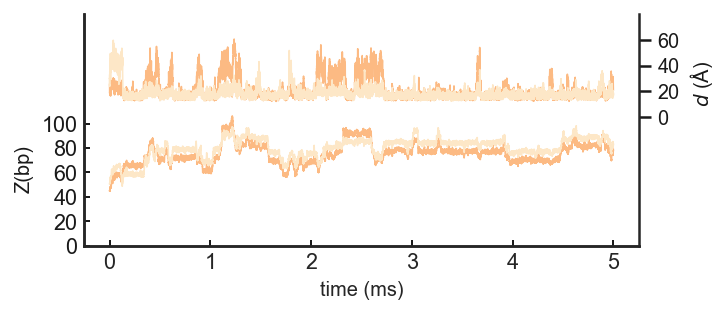

In [22]:
TrajectoryPlotting.plot_distance_position_angle_dimer(full_dimerS003,3,o2,save_file_name=trajectory_container+'S_003_3')


In [9]:
"""Here is the definition of the colormap, this is for DCCM plots and should be 
modified accordingly for any other matrix plots"""
from matplotlib import colors
def color(cmap):
    cmap = plt.cm.get_cmap(cmap,20)
    greys = plt.cm.get_cmap('Greys',20)
    greylist = [greys(i) for i in range(cmap.N)]
    cmaplist = [cmap(i) for i in range(cmap.N)]
    #grey = greylist[0]
    #first = cmaplist[1]
    #for n,i in enumerate(cmaplist):
    #    cmaplist[n]=first
    #for x in [grey]:
    #    cmaplist.insert(0,x)
    #create the new map
    cmap = cmap.from_list('Custom cmap', cmaplist, (cmap.N+1))
    # define the bins and normalize
    #bounds = (-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1)
    #norm = colors.BoundaryNorm(bounds, cmap.N)
    return(cmap)

In [10]:

sns.set_context("paper")

sns.set(font_scale=0.9)
sns.set_style("white")
trajectory_container='/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/version10/Figure3/'

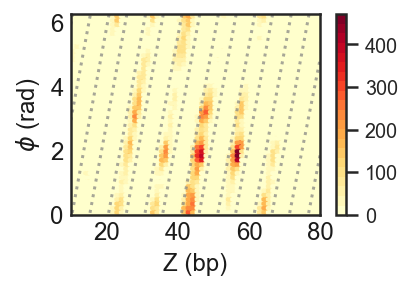

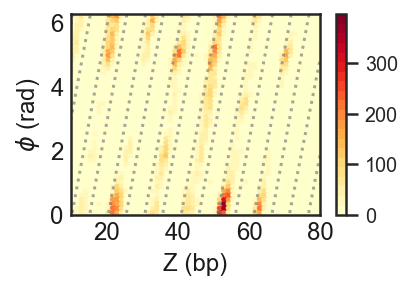

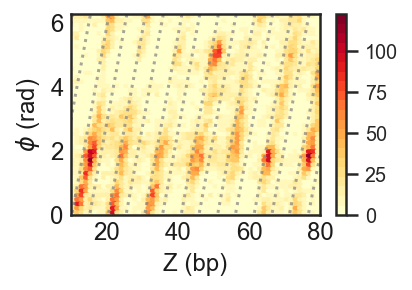

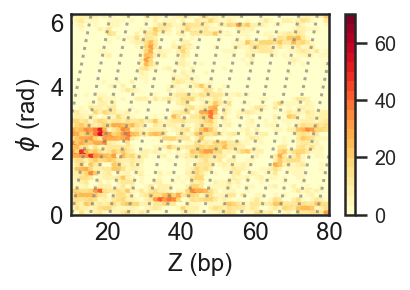

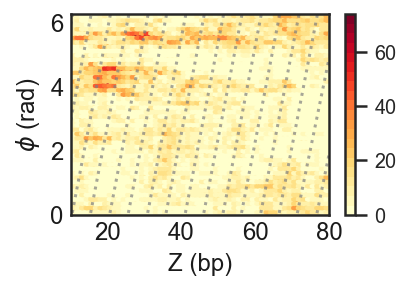

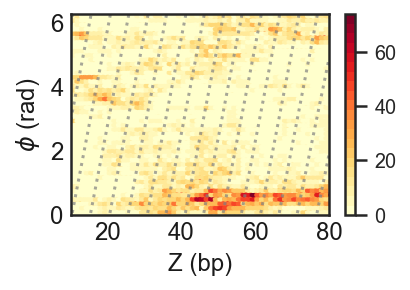

In [11]:
cmap=color('YlOrRd')
TrajectoryPlotting.plot_position_angle_dimer_hex(full_dimerS001,10,save_file_name=trajectory_container+'hex_S_001')
TrajectoryPlotting.plot_position_angle_dimer_hex(full_dimerS002,10)
TrajectoryPlotting.plot_position_angle_dimer_hex(full_dimerS003,10,save_file_name=trajectory_container+'hex_S_003')
TrajectoryPlotting.plot_position_angle_dimer_hex(full_dimerS004,10)
TrajectoryPlotting.plot_position_angle_dimer_hex(full_dimerS005,10)
TrajectoryPlotting.plot_position_angle_dimer_hex(full_dimerS006,10)

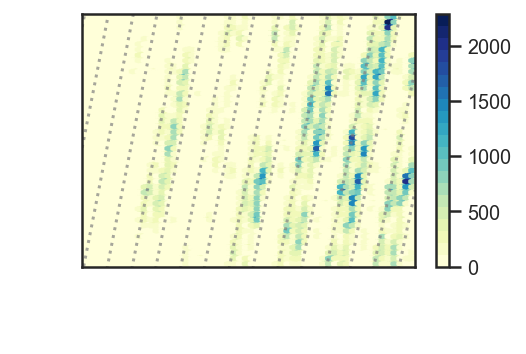

In [12]:
cmap=color('YlGnBu')
dfA = pd.concat([full_dimerR001[0][replica] for replica in range(len(full_dimerR001[0]))])

fig, ax = plt.subplots(figsize = (3.8,2.6))
        #sns.kdeplot(dfA['position'][::skip_frames]/3.3+50,dfA['angle'][::skip_frames]*(np.pi/180),\
        #            shade=True, cmap=cmap, n_levels=50, cbar=True)
        #sns.displot(dfA['position'][::skip_frames]/3.3+50,dfA['angle'][::skip_frames]*(np.pi/180),\
        #            cmap=cmap)
plt.hexbin(dfA['position'][::1]/3.3+50, dfA['angle'][::1]*(np.pi/180), \
                   gridsize=80, cmap=cmap, extent=[0, 100, 0, 2*np.pi])
        #plt.plot(dfB['position'][::skip_frames]/3.3+50,dfB['angle'][::skip_frames]*(np.pi/180),color=color,linewidth=0.5)
ax.tick_params(
                    axis='both',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=True,      # ticks along the bottom edge are off
                    top=True,         # ticks along the top edge are off
                    labelbottom=True,
                    labeltop = False,
                    right=True, left=True, labelleft=True,labelsize='small',
                    width = 0.5,
                    length = 3, color='white',direction ='in')
ax.tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',colors='white')
ax.tick_params(
                axis='y',          # changes apply to the x-axis
                which='both',colors='white')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
Ztt = np.arange(10,90,10)
for f in range(len(Grooves.groove_functions_plotting())):
    plt.plot(Ztt,Grooves.groove_functions_plotting()[f](Ztt)-1.5,':',alpha=0.7,color='grey')
    plt.plot(Ztt,Grooves.groove_functions_plotting()[f](Ztt)+1.5,':',alpha=0.7,color='grey')
plt.colorbar()
axes = plt.gca()
axes.set_ylim(0,2*np.pi)
axes.set_xlim(10,80)
plt.ylabel('$\phi$ (rad)', fontsize = 16,color='white')
plt.xlabel('Z (bp)', fontsize = 16,color='white')
plt.tight_layout()
#if save_file_name:
#            plt.savefig(save_file_name,dpi=300,transparent=True)

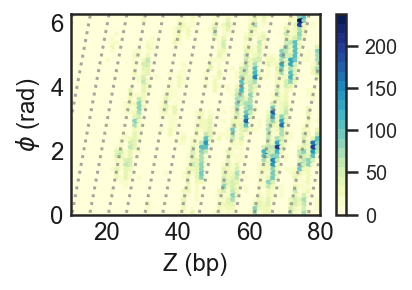

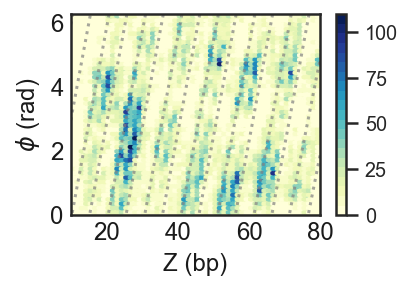

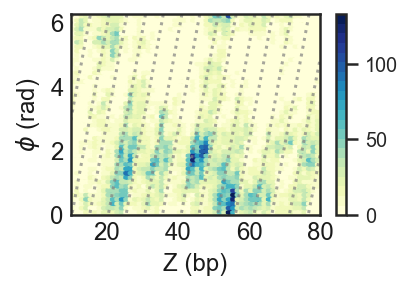

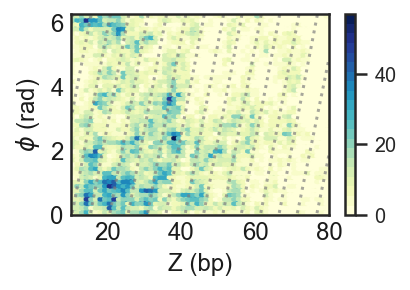

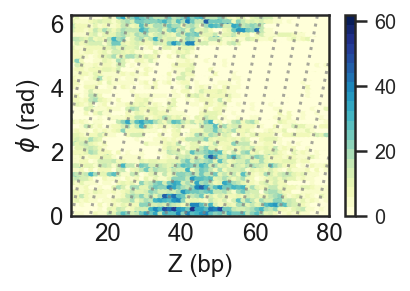

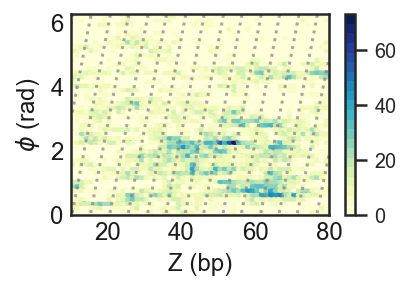

In [30]:
cmap=color('YlGnBu')
TrajectoryPlotting.plot_position_angle_dimer_hex(full_dimerR001,10,save_file_name=trajectory_container+'hex_R_001')
TrajectoryPlotting.plot_position_angle_dimer_hex(full_dimerR002,10)
TrajectoryPlotting.plot_position_angle_dimer_hex(full_dimerR003,10,save_file_name=trajectory_container+'hex_R_003')
TrajectoryPlotting.plot_position_angle_dimer_hex(full_dimerR004,10)
TrajectoryPlotting.plot_position_angle_dimer_hex(full_dimerR005,10)
TrajectoryPlotting.plot_position_angle_dimer_hex(full_dimerR006,10)

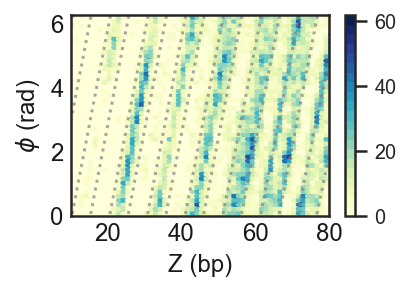

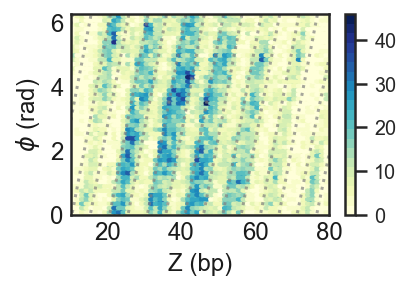

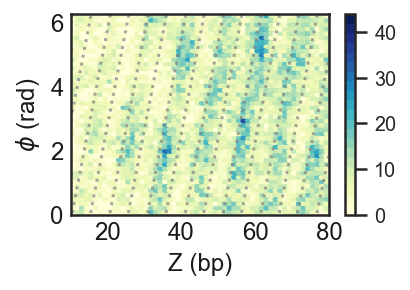

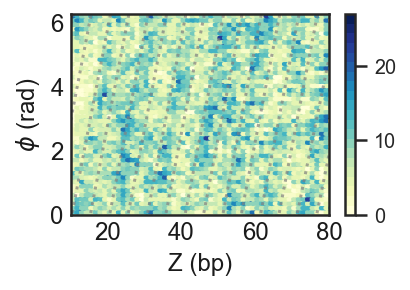

In [27]:
cmap=color('YlGnBu')
TrajectoryPlotting.plot_position_angle_dimer_hex(dimerR001,10,save_file_name=trajectory_container+'hex_dimer_R_001')
TrajectoryPlotting.plot_position_angle_dimer_hex(dimerR002,10)
TrajectoryPlotting.plot_position_angle_dimer_hex(dimerR003,10,save_file_name=trajectory_container+'hex_dimer_R_003')
TrajectoryPlotting.plot_position_angle_dimer_hex(dimerR004,10)

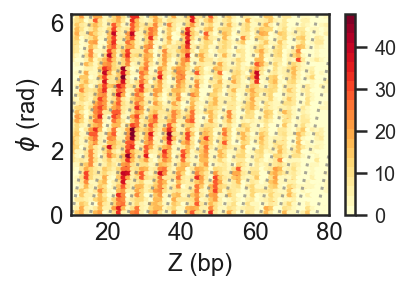

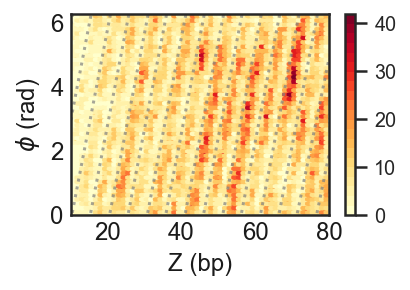

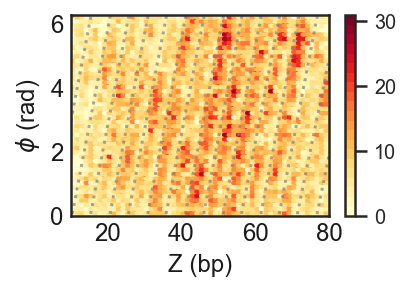

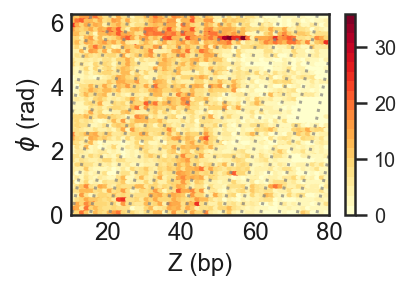

In [25]:
cmap=color('YlOrRd')
TrajectoryPlotting.plot_position_angle_dimer_hex(dimerS001,10,save_file_name=trajectory_container+'hex_dimer_S_001')
TrajectoryPlotting.plot_position_angle_dimer_hex(dimerS002,10)
TrajectoryPlotting.plot_position_angle_dimer_hex(dimerS003,10)
TrajectoryPlotting.plot_position_angle_dimer_hex(dimerS004,10)

In [202]:
monomerS001[0]

distance  position       angle
0        45.959     5.579  220.760638
1        45.729     5.738  220.474160
2        45.003     5.934  219.786610
3        45.194     6.352  220.244976
4        45.228     5.425  218.125033
...         ...       ...         ...
99995    15.850     5.147  272.727910
99996    15.901     5.771  273.472756
99997    16.036     6.049  275.707291
99998    16.309     5.803  276.853207
99999    16.553     5.574  275.134333

[100000 rows x 3 columns]

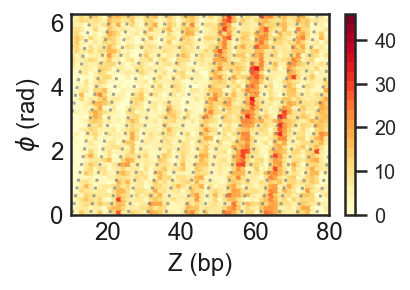

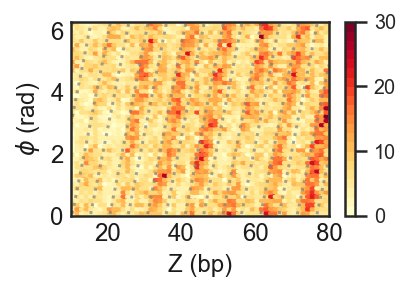

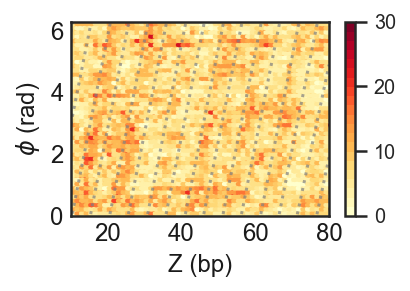

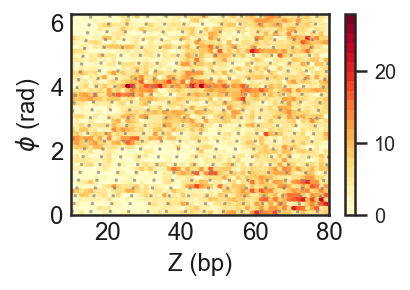

In [34]:
cmap=color('YlOrRd')

TrajectoryPlotting.plot_position_angle_monomer_hex(monomerS001,10,save_file_name=trajectory_container+'hex_mono_S_001')
TrajectoryPlotting.plot_position_angle_monomer_hex(monomerS002,10)
TrajectoryPlotting.plot_position_angle_monomer_hex(monomerS003,10)
TrajectoryPlotting.plot_position_angle_monomer_hex(monomerS004,10)

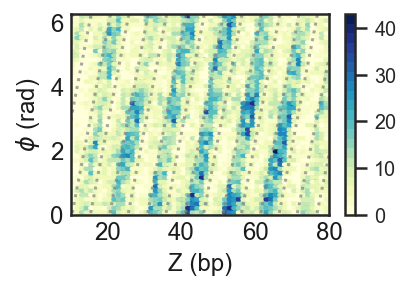

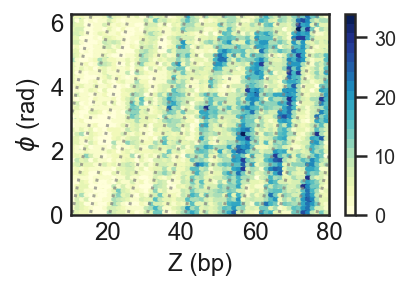

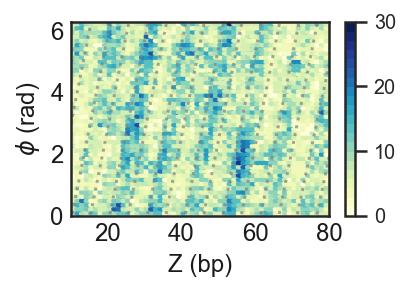

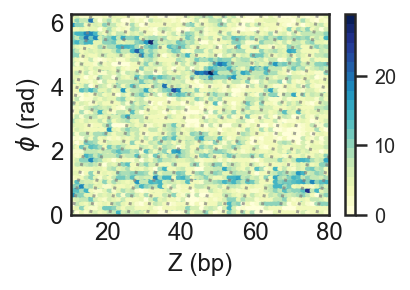

In [35]:
cmap=color('YlGnBu')

TrajectoryPlotting.plot_position_angle_monomer_hex(monomerR001,10,save_file_name=trajectory_container+'hex_mono_R_001')
TrajectoryPlotting.plot_position_angle_monomer_hex(monomerR002,10)
TrajectoryPlotting.plot_position_angle_monomer_hex(monomerR003,10)
TrajectoryPlotting.plot_position_angle_monomer_hex(monomerR004,10)

In [12]:
trajectory_container_angle='/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/version10/SI/trajectories_angle/'

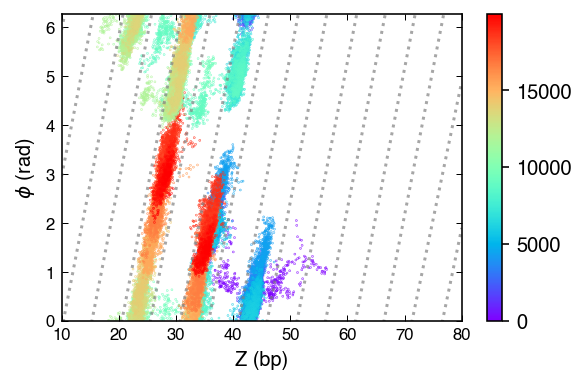

In [21]:
TrajectoryPlotting.plot_position_angle_dimer(full_dimerS001,0,5,o2,save_file_name=trajectory_container_angle+'S001_1')

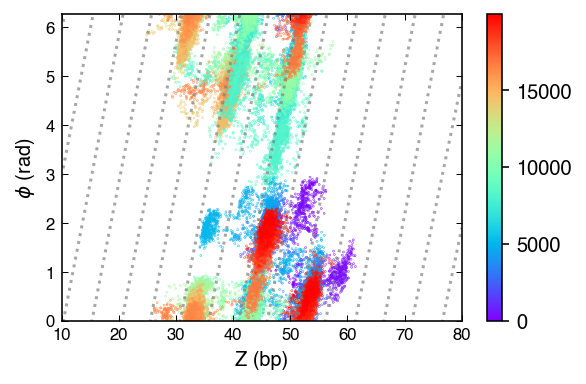

In [22]:
TrajectoryPlotting.plot_position_angle_dimer(full_dimerS002,0,5,o2,save_file_name=trajectory_container_angle+'S002_1')

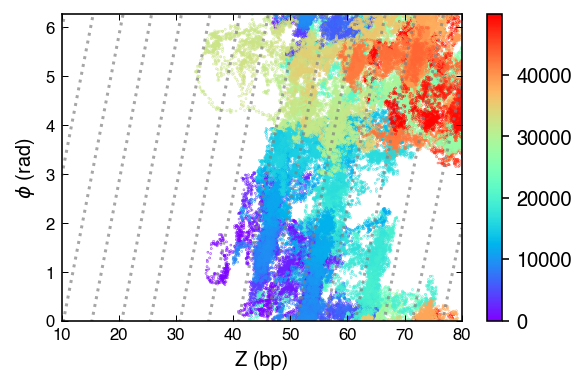

In [23]:
TrajectoryPlotting.plot_position_angle_dimer(full_dimerS003,0,2,o2,save_file_name=trajectory_container_angle+'S003_1')

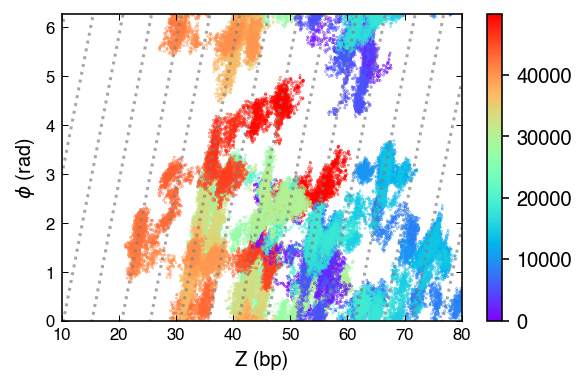

In [24]:
TrajectoryPlotting.plot_position_angle_dimer(full_dimerR001,0,2,o2,save_file_name=trajectory_container_angle+'R001_1')

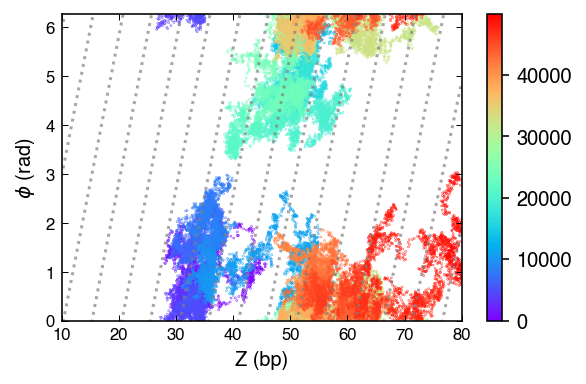

In [258]:
TrajectoryPlotting.plot_position_angle_dimer(full_dimerR003,0,2,o2,save_file_name=trajectory_container_angle+'R003_1')

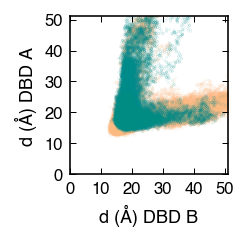

In [19]:
TrajectoryPlotting.plot_distance_AB_dimer(full_dimerS003,full_dimerR003,0,1)

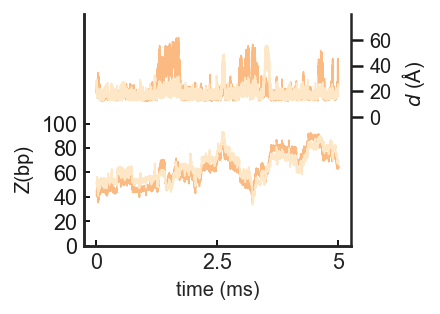

In [15]:
TrajectoryPlotting.plot_distance_position_angle_dimer(full_dimerS003,0,o2)#,save_file_name="/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/Version9/Figure4_plots/trajectory.png")

In [16]:
trajectory_container='/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/version10/SI/trajectories/'

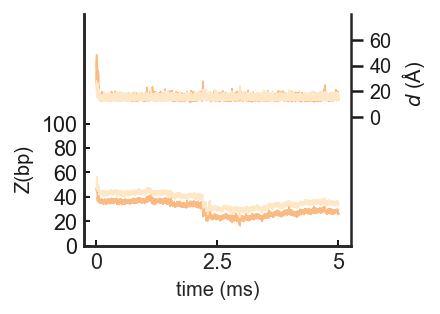

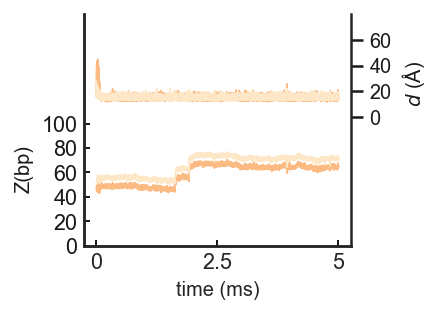

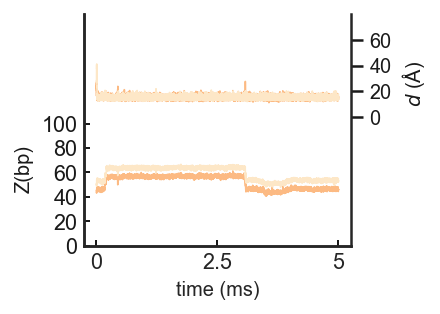

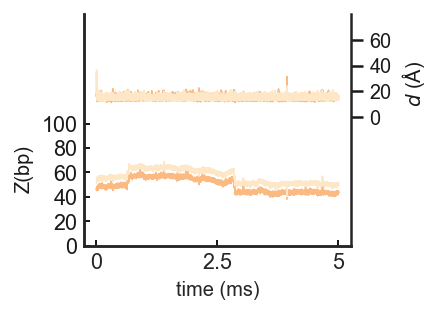

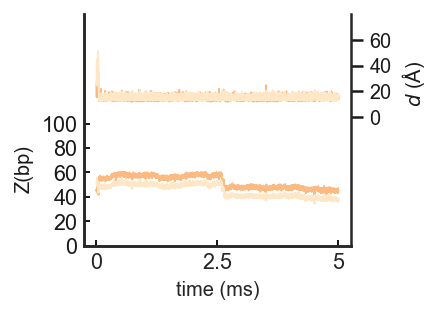

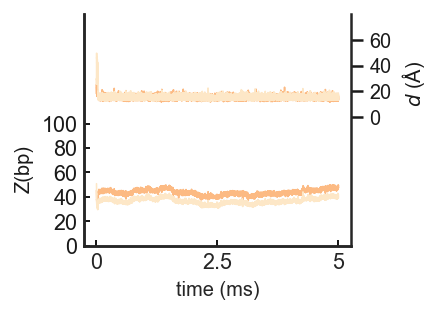

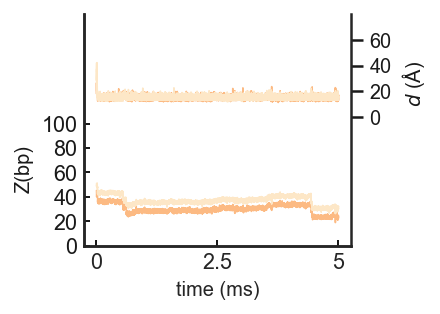

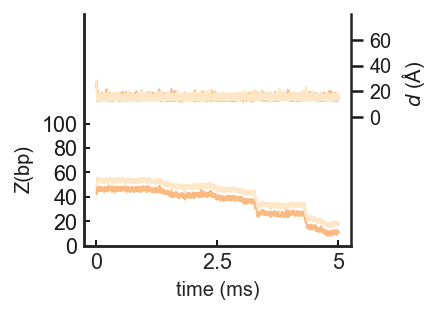

In [17]:
TrajectoryPlotting.plot_distance_position_angle_dimer(full_dimerS001,0,o1,save_file_name=trajectory_container+'S_001_1')
TrajectoryPlotting.plot_distance_position_angle_dimer(full_dimerS001,1,o2)
TrajectoryPlotting.plot_distance_position_angle_dimer(full_dimerS001,2,o1,save_file_name=trajectory_container+'S_001_2')
TrajectoryPlotting.plot_distance_position_angle_dimer(full_dimerS001,3,o2)
TrajectoryPlotting.plot_distance_position_angle_dimer(full_dimerS001,4,o2)
TrajectoryPlotting.plot_distance_position_angle_dimer(full_dimerS001,5,o2)
TrajectoryPlotting.plot_distance_position_angle_dimer(full_dimerS001,6,o1,save_file_name=trajectory_container+'S_001_3')
TrajectoryPlotting.plot_distance_position_angle_dimer(full_dimerS001,7,o1)

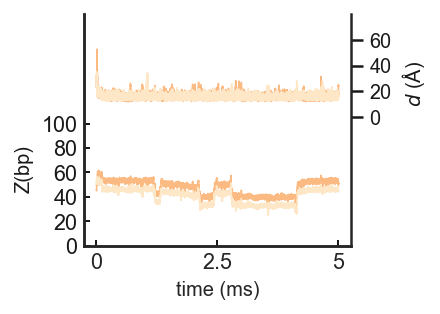

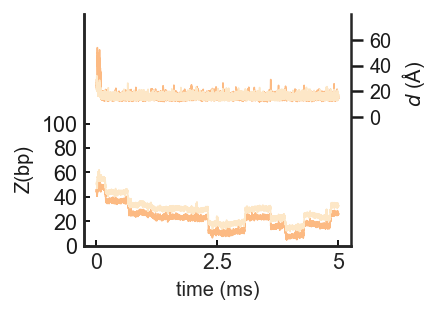

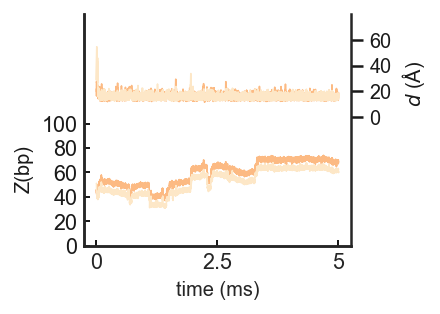

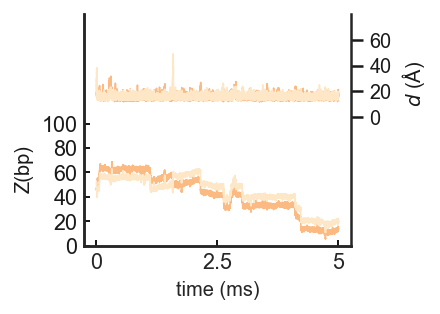

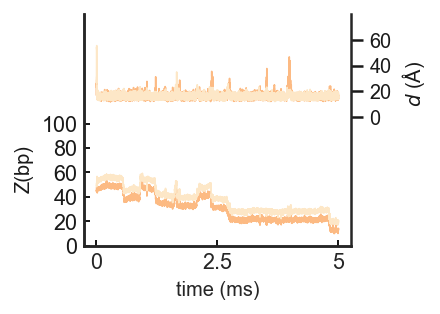

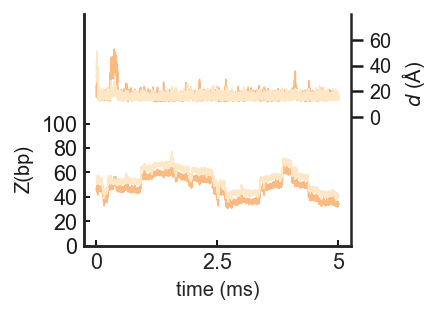

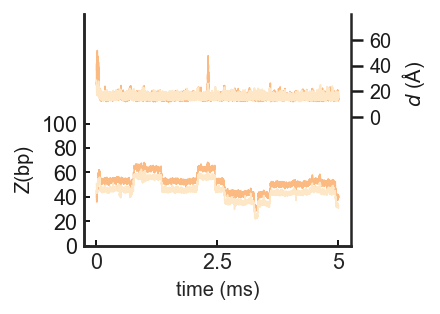

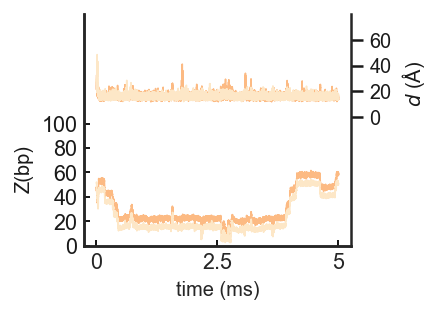

In [19]:
TrajectoryPlotting.plot_distance_position_angle_dimer(full_dimerS002,0,o2,save_file_name=trajectory_container+'S_002_1')
TrajectoryPlotting.plot_distance_position_angle_dimer(full_dimerS002,1,o2)
TrajectoryPlotting.plot_distance_position_angle_dimer(full_dimerS002,2,o2,save_file_name=trajectory_container+'S_002_3')
TrajectoryPlotting.plot_distance_position_angle_dimer(full_dimerS002,3,o2)
TrajectoryPlotting.plot_distance_position_angle_dimer(full_dimerS002,4,o2)
TrajectoryPlotting.plot_distance_position_angle_dimer(full_dimerS002,5,o2)
TrajectoryPlotting.plot_distance_position_angle_dimer(full_dimerS002,6,o2,save_file_name=trajectory_container+'S_002_7')
TrajectoryPlotting.plot_distance_position_angle_dimer(full_dimerS002,7,o2)

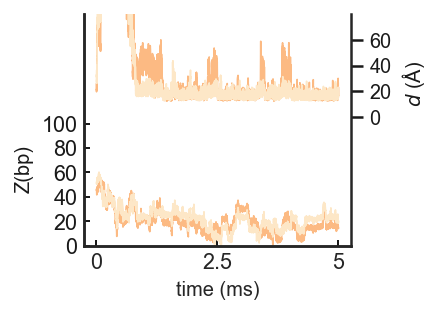

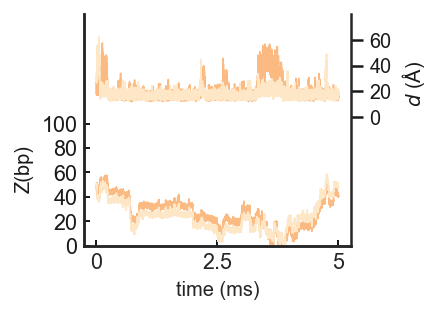

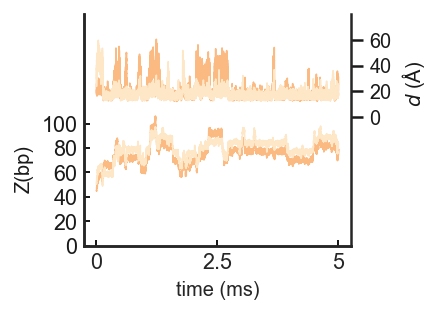

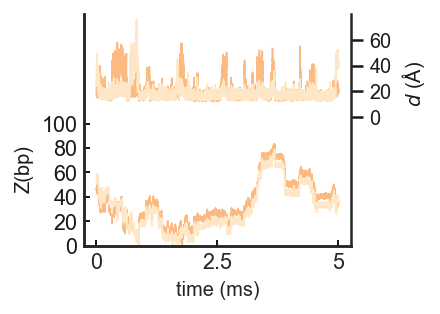

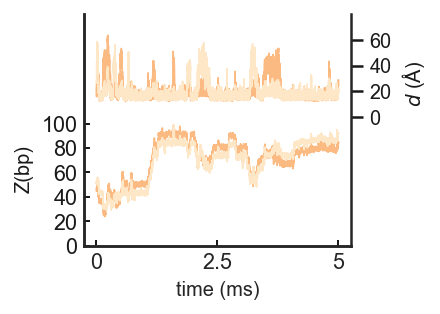

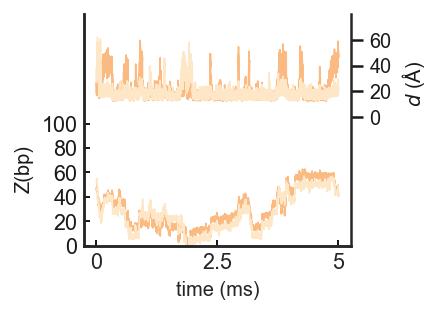

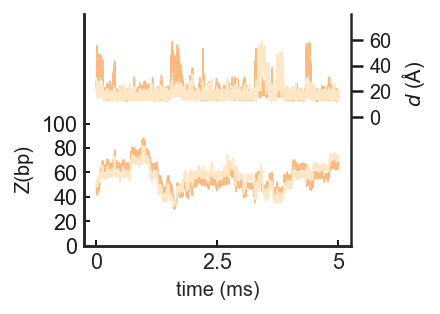

In [20]:
TrajectoryPlotting.plot_distance_position_angle_dimer(full_dimerS003,1,o2)
TrajectoryPlotting.plot_distance_position_angle_dimer(full_dimerS003,2,o2,save_file_name=trajectory_container+'S_003_2')
TrajectoryPlotting.plot_distance_position_angle_dimer(full_dimerS003,3,o2,save_file_name=trajectory_container+'S_003_3')
TrajectoryPlotting.plot_distance_position_angle_dimer(full_dimerS003,4,o2,save_file_name=trajectory_container+'S_003_4')
TrajectoryPlotting.plot_distance_position_angle_dimer(full_dimerS003,5,o2)
TrajectoryPlotting.plot_distance_position_angle_dimer(full_dimerS003,6,o2)
TrajectoryPlotting.plot_distance_position_angle_dimer(full_dimerS003,7,o2)

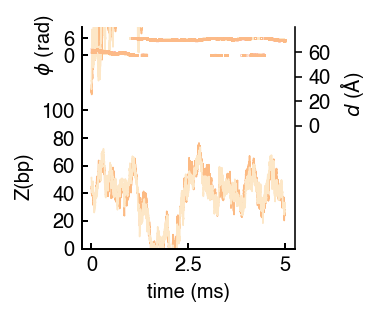

In [93]:
TrajectoryPlotting.plot_distance_position_angle_dimer(full_dimerR005,1,o2)

In [ ]:
#TrajectoryPlotting.plot_position_angle_monomer(monomerS002,3,5,o2,'/Users/mallu899/Documents/projects/lacI_CG_master/LacI_CG_Draft/Figures/Version9/Figure1_plots/S_mono02.png')

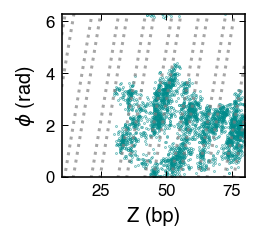

In [32]:
TrajectoryPlotting.plot_position_angle_dimer(full_dimerR003,2,30,'darkcyan','/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/Version9/Figure1_plots/R_full03.png')
#TrajectoryPlotting.plot_position_angle_dimer(dimerS002,3,20,o2,'/Users/mallu899/Documents/projects/lacI_CG_master/LacI_CG_Draft/Figures/Version9/Figure1_plots/S_dimer02.png')
#TrajectoryPlotting.plot_position_angle_dimer(dimerR002,3,20,g3,'/Users/mallu899/Documents/projects/lacI_CG_master/LacI_CG_Draft/Figures/Version9/Figure1_plots/R_dimer02.png')
#TrajectoryPlotting.plot_position_angle_dimer(full_dimerS002,3,40,o2,'/Users/mallu899/Documents/projects/lacI_CG_master/LacI_CG_Draft/Figures/Version9/Figure1_plots/S_full02.png')
#TrajectoryPlotting.plot_position_angle_dimer(full_dimerR002,4,40,g3,'/Users/mallu899/Documents/projects/lacI_CG_master/LacI_CG_Draft/Figures/Version9/Figure1_plots/R_full02.png')
